In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # To split data into training and testing
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # To evaluate the model

In [2]:
#Reading the dataset
df=pd.read_csv('car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
#Drop column not necessary for the analysis
df.drop(['Engine_Size','Owner_Count'] ,axis=1,inplace=True)
df.head()

,Brand,Model,Year,Fuel_Type,Transmission,Mileage,Doors,Price
0,Kia,Rio,2020,Diesel,Manual,289944,3,8501
1,Chevrolet,Malibu,2012,Hybrid,Automatic,5356,2,12092
2,Mercedes,GLA,2020,Diesel,Automatic,231440,4,11171
3,Audi,Q5,2023,Electric,Manual,160971,2,11780
4,Volkswagen,Golf,2003,Hybrid,Semi-Automatic,286618,3,2867


In [4]:
df.keys()

Index(['Brand', 'Model', 'Year', 'Fuel_Type', 'Transmission', 'Mileage',
       'Doors', 'Price'],
      dtype='object')

In [5]:
# Check for missing values
print(df.isnull().sum().sort_values(ascending=False))  # Display missing values count

Brand           0
Model           0
Year            0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Price           0
dtype: int64


In [6]:
# Check for duplicate values
print(df.duplicated().sum())  # Display count of duplicate rows

0


In [7]:
# Display descriptive summary of the dataset
print(df.describe())  # Show summary statistics for numerical columns

               Year        Mileage         Doors        Price
count  10000.000000   10000.000000  10000.000000  10000.00000
mean    2011.543700  149239.111800      3.497100   8852.96440
std        6.897699   86322.348957      1.110097   3112.59681
min     2000.000000      25.000000      2.000000   2000.00000
25%     2006.000000   74649.250000      3.000000   6646.00000
50%     2012.000000  149587.000000      3.000000   8858.50000
75%     2017.000000  223577.500000      4.000000  11086.50000
max     2023.000000  299947.000000      5.000000  18301.00000


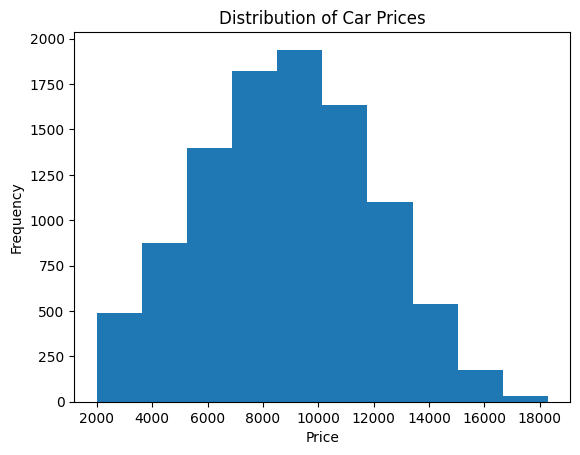

In [ ]:
# Visualizations
plt.hist(df['Price'])  # Plot histogram of car prices
plt.title('Distribution of Car Prices')  # Add title to the plot
plt.xlabel('Price')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.show()  # Display the plot

In [12]:
#Chechk if there is any datatype problem
df.info

<bound method DataFrame.info of            Brand     Model  Year Fuel_Type    Transmission  Mileage  Doors  \
0            Kia       Rio  2020    Diesel          Manual   289944      3   
1      Chevrolet    Malibu  2012    Hybrid       Automatic     5356      2   
2       Mercedes       GLA  2020    Diesel       Automatic   231440      4   
3           Audi        Q5  2023  Electric          Manual   160971      2   
4     Volkswagen      Golf  2003    Hybrid  Semi-Automatic   286618      3   
...          ...       ...   ...       ...             ...      ...    ...   
9995         Kia    Optima  2004    Diesel  Semi-Automatic     5794      2   
9996   Chevrolet    Impala  2002  Electric       Automatic   168000      2   
9997         BMW  3 Series  2010    Petrol       Automatic    86664      5   
9998        Ford  Explorer  2002    Hybrid       Automatic   225772      4   
9999  Volkswagen    Tiguan  2001    Diesel          Manual   157882      3   

      Price  
0      8501  
1     12092  
2     11171  
3     11780  
4      2867  
...     ...  
9995   8884  
9996   6240  
9997   9866  
9998   4084  
9999   3342  

[10000 rows x 8 columns]>

In [13]:
#Using label encoding to convert strings into numerical values
df['Brand']=df['Brand'].map({'Kia':0,'Chevrolet':1,'Mercedes':2,'Audi':3,'Volkswagen':4,
                                     'Toyota':5,'Honda':6,'BMW':7,'Hyundai':8,'Ford':9})
df['Model']=df['Model'].map({'Rio':0,'Malibu':1,'GLA':2,'Q5':3,'Golf':4,'Camry':5,'Civic':6,
                               'Sportage':7,'RAV4':8,'5 Series':9,'CR-V':10,'Elantra':11,'Tiguan':12,
                               'Equinox':13,'Explorer':14,'A3':15,'3 Series':16,'Tucson':17,'Passat':18,
                               'Impala':19,'Corolla':20,'Optima':21,'Fiesta':22,'A4':23,'Focus':24,'E-Class':25,
                               'Sonata':26,'C-Class':27,'X5':28,'Accord':29})

df['Fuel_Type']=df['Fuel_Type'].map({'Diesel':0,'Hybrid':1,'Petrol':2,'Electric':3})
df.head()

,Brand,Model,Year,Fuel_Type,Transmission,Mileage,Doors,Price
0,0,0,2020,0,Manual,289944,3,8501
1,1,1,2012,1,Automatic,5356,2,12092
2,2,2,2020,0,Automatic,231440,4,11171
3,3,3,2023,3,Manual,160971,2,11780
4,4,4,2003,1,Semi-Automatic,286618,3,2867


In [14]:
#Use One Hot encoding to convert strings into numerical values
df=pd.get_dummies(df,dtype=int) #if we dont put int the result would be True or False
df.head()

,Brand,Model,Year,Fuel_Type,Mileage,Doors,Price,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,0,0,2020,0,289944,3,8501,0,1,0
1,1,1,2012,1,5356,2,12092,1,0,0
2,2,2,2020,0,231440,4,11171,1,0,0
3,3,3,2023,3,160971,2,11780,0,1,0
4,4,4,2003,1,286618,3,2867,0,0,1


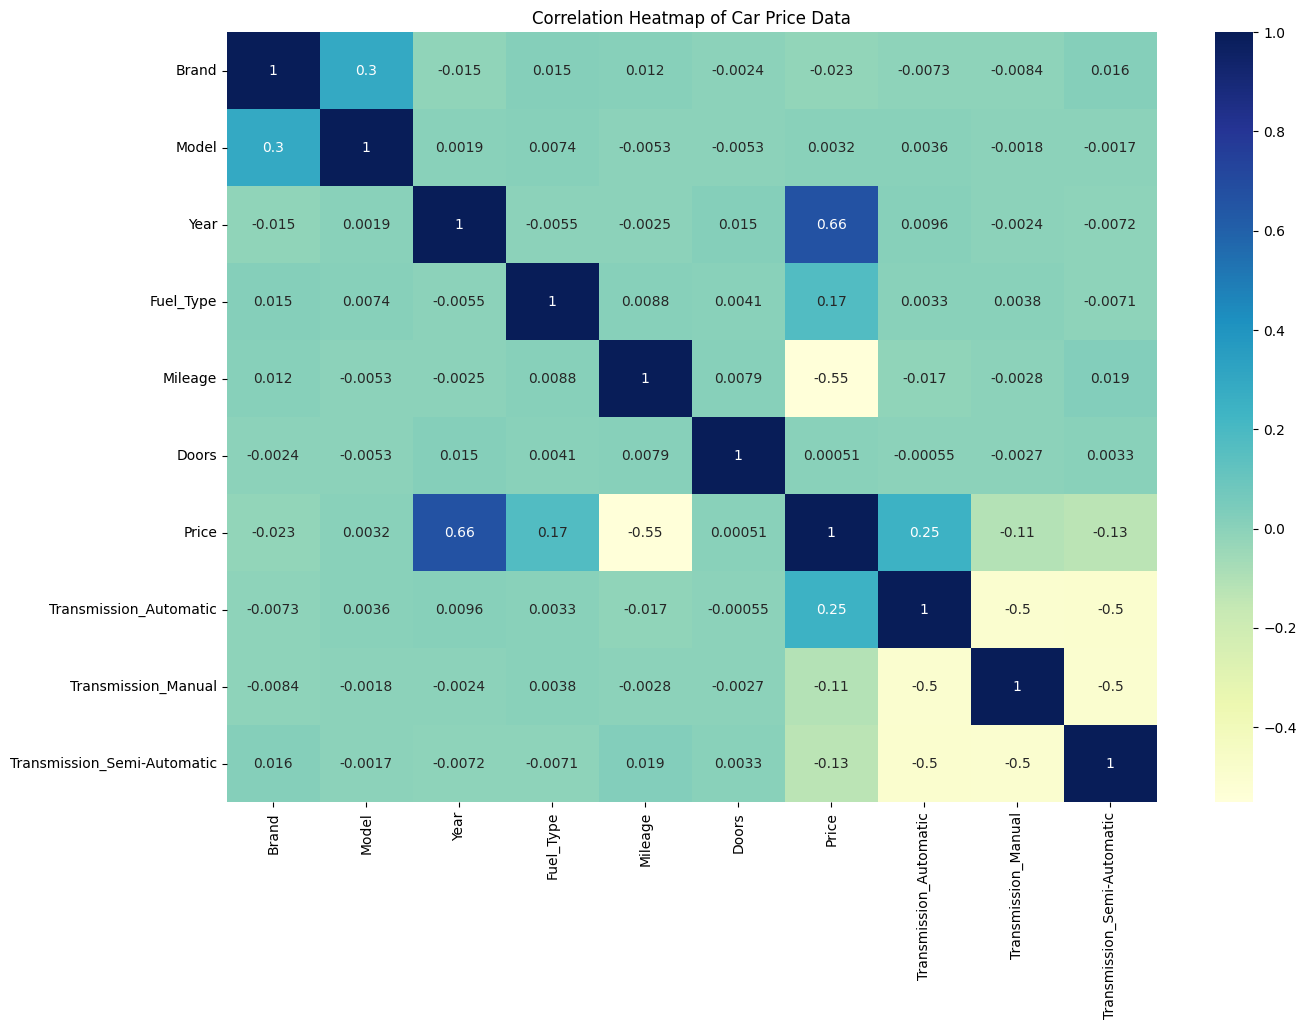

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of Car Price Data')  #title to the heatmap
plt.show()  # Display the heatmap

In [17]:
# Select features (independent variables) and target (dependent variable)
X = df.drop('Price', axis=1)  # Features (drop the target column 'price')
y = df['Price']  # Target variable

In [18]:
df.keys()

Index(['Brand', 'Model', 'Year', 'Fuel_Type', 'Mileage', 'Doors', 'Price',
       'Transmission_Automatic', 'Transmission_Manual',
       'Transmission_Semi-Automatic'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
# split this X and y into Train_data and test_data
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42 )

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 9), (2000, 9), (8000,), (2000,))

In [24]:
# intialize the model
model=LinearRegression()

# train the model
model.fit(X_train, y_train)

# test the model
y_pred=model.predict(X_test)

In [25]:
# Print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: -590338.4814996592
Coefficients: [-9.67028627e+00 -2.09822321e+00  2.99000229e+02  5.06843750e+02
 -1.97273615e-02 -4.74796270e+00  1.03606404e+03 -4.99231684e+02
 -5.36832357e+02]


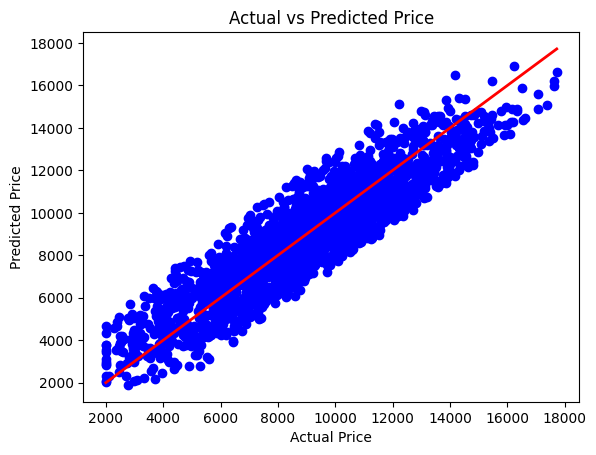

In [26]:
# Predicting the sales
y_pred = model.predict(X_test)

# Plotting actual vs predicted sales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  1624795.0133388215
Root Mean Squared Error:  1274.6744734789434
Mean Absolute Error:  1067.7996987387658
R2 Score:  0.8231575656868336


In [28]:
import pickle
pickle.dump(model, open('model_lr_cp_c0922989.pkl', 'wb')) # Save the trained model to a file
print('Model saved as linear_regression_car_price_model.pkl') # Confirm model is saved

Model saved as linear_regression_car_price_model.pkl
